# 学習モデル作成・保存

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping


batch_size = 128
num_classes = 10
# 学習回数
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# データを読み込む
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 前処理

##  TensorFlowとTheanoで場合わけ 画像を1次元化
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

## 画素を0~1の範囲に正規化
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# モデルを作成
model = Sequential()
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

## 学習のためのモデルを設定
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## 学習開始
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[EarlyStopping()])

# データ水増し 上下左右に10%ずらす あまり精度が出なかった
# datagen = image.ImageDataGenerator(
#     width_shift_range=0.1,
#     height_shift_range=0.1)
# datagen.fit(x_train)
# # here's a more "manual" example
# for e in range(epochs):
#     print('Epoch', e)
#     batches = 0
#     for x_batch, y_batch in datagen.flow(x_train, y_train, batch_size=32):
#         model.fit(x_batch, y_batch,
#                   batch_size=batch_size,
#                   epochs=epochs,
#                   verbose=1,
#                   validation_data=(x_test, y_test))
#         batches += 1
#         if batches >= len(x_train) / 32:
#             # we need to break the loop by hand because
#             # the generator loops indefinitely
#             break

## モデルの損失値と評価値を返す
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 保存 ディレクトリに出力される
model.save("../test2.h5")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.2130 - acc: 0.9339 - val_loss: 0.0465 - val_acc: 0.9855
Epoch 2/10
60000/60000 [==============================] - 142s 2ms/step - loss: 0.0759 - acc: 0.9775 - val_loss: 0.0384 - val_acc: 0.9881
Epoch 3/10
60000/60000 [==============================] - 136s 2ms/step - loss: 0.0564 - acc: 0.9829 - val_loss: 0.0336 - val_acc: 0.9883
Epoch 4/10
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0480 - acc: 0.9862 - val_loss: 0.0325 - val_acc: 0.9895
Epoch 5/10
60000/60000 [==============================] - 135s 2ms/step - loss: 0.0407 - a

# 検証

In [3]:
# 学習済みモデル読み込み
from keras.models import load_model
loadedModel = load_model("../test2.h5")

(1, 28, 28, 1) uint8
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
数値： 5


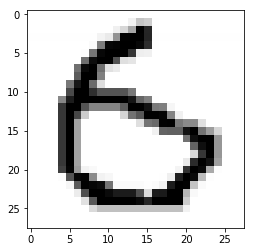

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

# 5と誤認識 今のデータセットだと無理っぽい
img_path = '../img/6.png'
img = load_img(img_path, color_mode = "grayscale", target_size=(28, 28)) #入力画像のサイズ
x = img_to_array(img) # 画像データをnumpy.arrayへ変換
# なぜか逆になっている
x = 255 - x
x = np.expand_dims(x, axis=0)
x = x.astype('uint8')

# 閾値を下回るものは0にする
x = np.where(x>100, x, 0)

# print(x[0])
print(x.shape, x.dtype)
predicated = loadedModel.predict(x)
print(predicated)

# 検証
print("数値：", np.argmax(predicated))
# テスト画像データを表示
plt.imshow(img, cmap =plt.cm.gray_r)
plt.show()

(1, 28, 28, 1) uint8
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
数値： 2


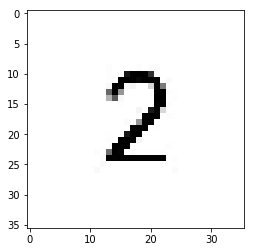

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import img_to_array, load_img
import numpy as np
from keras.applications.imagenet_utils import preprocess_input, decode_predictions

# 周りをトリミングしている
img_path = '../img/2.jpg'
img = load_img(img_path, color_mode = "grayscale", target_size=(36, 36)) #入力画像のサイズ
x = img_to_array(img) # 画像データをnumpy.arrayへ変換
# 上下左右4pxトリム
x = x[4:32, 4:32]
# なぜか逆になっている
x = 255 - x
x = np.expand_dims(x, axis=0)
x = x.astype('uint8')

# 閾値を下回るものは0にする
x = np.where(x>100, x, 0)

# print(x[0])
print(x.shape, x.dtype)
predicated = loadedModel.predict(x)
print(predicated)

# 検証
print("数値：", np.argmax(predicated))
# テスト画像データを表示
plt.imshow(img, cmap =plt.cm.gray_r)
plt.show()